In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import random as rnd
%matplotlib inline

[-2.5, 3, -0.5, 1.5]

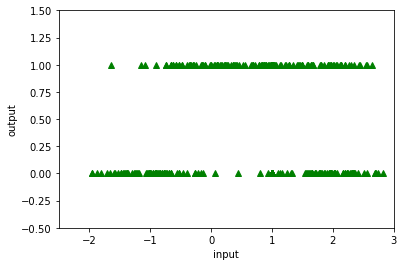

In [485]:
data = sio.loadmat('HW2_Data/data1.mat')
X = data['X_trn']
Y = data['Y_trn']
Xtest = data['X_tst']
Ytest = data['Y_tst']

ones = np.ones(Y.shape, dtype=np.int)
X = np.append(ones, X, axis=1)

ones = np.ones(Ytest.shape, dtype=np.int)
Xtest = np.append(ones, Xtest, axis=1)

plt.plot(X, Y, "g^")
plt.ylabel('output')
plt.xlabel('input')
plt.axis([-5/2, 3, -1/2, 3/2])


[-2.5, 3, -0.5, 1.5]

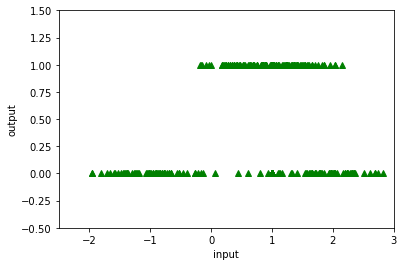

In [486]:
data2 = sio.loadmat('HW2_Data/data2.mat')
X2 = data2['X_trn']
Y2 = data2['Y_trn']
Xtest2 = data2['X_tst']
Ytest2 = data2['Y_tst']

ones2 = np.ones(Y2.shape, dtype=np.int)
X2 = np.append(ones2, X2, axis=1)

ones2 = np.ones(Ytest2.shape, dtype=np.int)
Xtest2 = np.append(ones2, Xtest2, axis=1)

plt.plot(X2, Y2, "g^")
plt.ylabel('output')
plt.xlabel('input')
plt.axis([-5/2, 3, -1/2, 3/2])

In [487]:
def computeError(Y, Ysig):
    Ysig = np.round_(Ysig);
    count = 0

    for i in range(Y.shape[0]):
        if (Y[i, 0] != Ysig[i,0]): count+= 1;
    print(count)    
    return count/Ysig.shape[0]

In [488]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.ravel().shape[1]
    
    for i in range(iters):
        error = sigmoid(X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
    return theta

In [489]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [490]:
def plotPrediction(xLabel, yLabel, f, X_trn, classChange):

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(x, f, 'r', label='Prediction')
    ax.scatter(X_trn[0:classChange,0], X_trn[0:classChange,1], label='0')
    ax.scatter(X_trn[classChange+1:X_trn.shape[0],0], X_trn[classChange+1:X_trn.shape[0],1], label='1')
    ax.legend(loc=2)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title('Predicted x1 vs. x2 on training samples')
    

In [491]:
def plotOnTest(xLabel, yLabel, f, X_tst):

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(x, f, 'r', label='Prediction')
    ax.scatter(X_tst[0:7,0], X_tst[0:7,1], label='0')
    ax.scatter(X_tst[8:X_tst.shape[0],0], X_tst[8:X_tst.shape[0],1], label='1')
    ax.legend(loc=2)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title('Predicted x1 vs. x2 on test samples')

In [492]:
X = np.matrix(X)
Y = np.matrix(Y)
theta = np.matrix(np.array([0,0,0]))

In [493]:
theta.shape, Y.shape, X.shape

((1, 3), (136, 1), (136, 3))

0
0
weights:  [[ 0.51082868  2.36914021 -1.34644579]] Classification Error for training samples:  0.0
weights:  [[ 0.51082868  2.36914021 -1.34644579]] Classification Error for test samples:  0.0


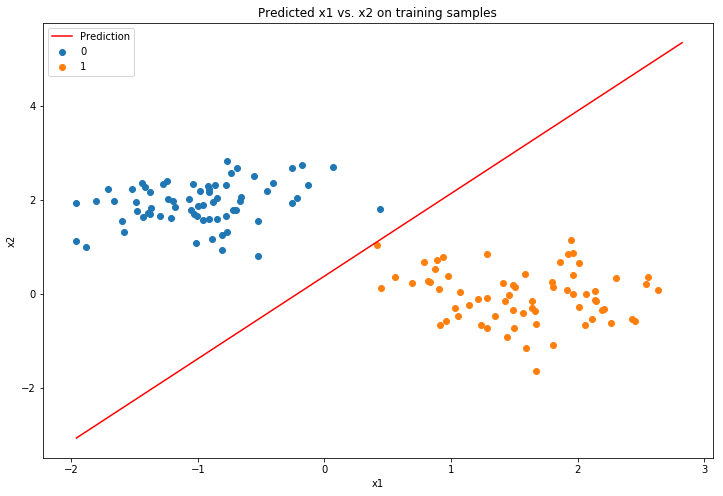

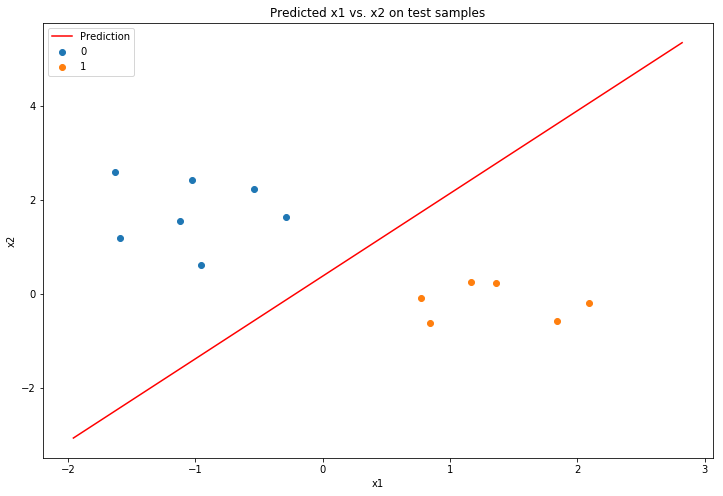

In [494]:
g = gradientDescent(X, Y, theta, alpha=0.006, iters=5000)

x = np.linspace(X.min(), X.max(), 100)
f = -(g[0, 0] + (g[0, 1] * x))/g[0, 2] 
error = computeError(Y, sigmoid(np.matmul(X, g.T)))
error2 = computeError(Ytest, sigmoid(np.matmul(Xtest, g.T)))

print("weights: ", g, "Classification Error for training samples: ", error)
print("weights: ", g, "Classification Error for test samples: ", error2)

plotPrediction('x1', 'x2', f, data['X_trn'], 68)
plotOnTest('x1', 'x2', f, data['X_tst'])

In [495]:
X2 = np.matrix(X2)
Y2 = np.matrix(Y2)
theta2 = np.matrix(np.array([0,0,0]))

In [496]:
theta.shape, Y2.shape, X2.shape


((1, 3), (126, 1), (126, 3))

3
0
weights:  [[ 1.03563834  3.36784703 -0.68968929]] Classification Error for training samples:  0.023809523809523808
weights:  [[ 1.03563834  3.36784703 -0.68968929]] Classification Error for test samples:  0.0


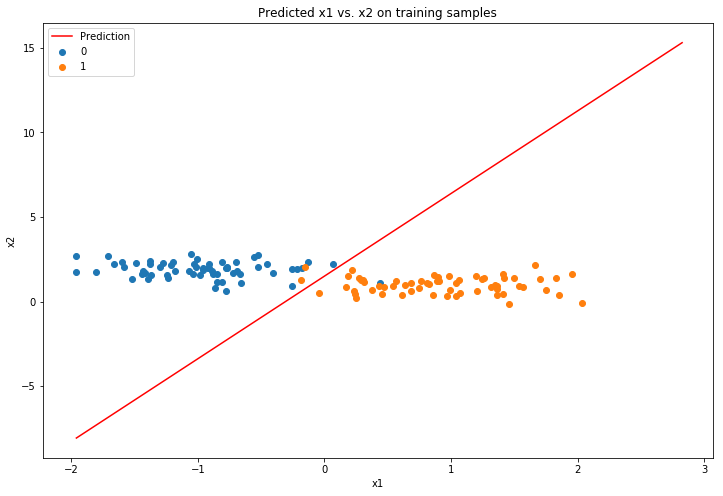

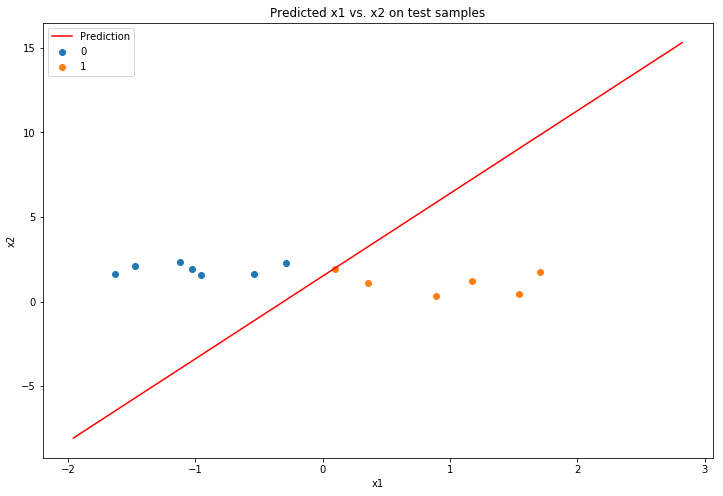

In [497]:
g2 = gradientDescent(X2, Y2,  theta2, alpha=0.009, iters=5000)

x = np.linspace(X2.min(), X2.max(), 100)
f2 = -(g2[0, 0] + (g2[0, 1] * x))/g2[0, 2] 

error = computeError(Y2, sigmoid(np.matmul(X2, g2.T)))
error2 = computeError(Ytest2, sigmoid(np.matmul(Xtest2, g2.T)))

print("weights: ", g2, "Classification Error for training samples: ", error)
print("weights: ", g2, "Classification Error for test samples: ", error2)

plotPrediction('x1', 'x2', f2, data2['X_trn'], 63)
plotOnTest('x1', 'x2', f2, data2['X_tst'])


In [498]:
ajkjk = [[0],[1],[2]]